<a href="https://colab.research.google.com/github/MATHKIMS/dongwoo_project/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Packages
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9) # 그림(figure)의 크기. (가로, 세로) 인치 단위

### 출력 영상에 한글 표시
plt.rcParams['font.family'] = "Gulim"   # 'AppleGothic' in mac

In [3]:
### changes the current working directory
os.chdir(r'D:\image')

FileNotFoundError: ignored

In [4]:
### 영상 출력 함수
def fn_imshow(img, axis='off', fig_size=''):
    if fig_size!='': plt.figure(figsize=fig_size)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    if axis!='on': plt.axis('off')
    plt.show()

In [5]:
### Packages
!pip install mnist
import mnist

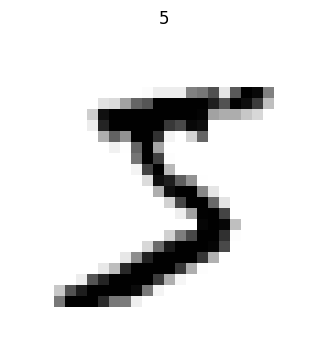

In [6]:
### 영상 추출
idx = 0
sample_img = mnist.train_images()[idx]

### 영상에 해당하는 숫자
no = mnist.train_labels()[idx]

### 영상 출력
plt.figure(figsize=(4,4))
plt.imshow(sample_img, cmap='binary')
plt.axis('off')
plt.title(str(no))
plt.show()

In [7]:
### Package & module
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [8]:
### Input & output data - 1000개
X = mnist.train_images()[:1000]
y = mnist.train_labels()[:1000]
print('X.shape: ', X.shape, ' y.shape: ', y.shape)

X.shape:  (1000, 28, 28)  y.shape:  (1000,)


In [10]:
X.shape[0]

1000

In [9]:
### 구조 변경: 2차원 → 1차원
X = X.reshape(X.shape[0], 28*28)

In [11]:
### Split - train & test data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.6,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=7513)

In [12]:
### 표준화 변환
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [13]:
### RBF(Radial Basis Function) 커널을 사용한 서포트 벡터 머신
svc = SVC(kernel = "rbf", C = 10, gamma = 0.001, random_state = 7513)

In [14]:
### 모형 적합
fit_svc = svc.fit(X_train, y_train)

In [15]:
### 검정자료 예측
pred_svc = fit_svc.predict(X_test)

In [16]:
### 정오분류표
pd.crosstab(y_test, pred_svc)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,38,0,1,0,0,0,0,0,0,0
1,0,46,0,0,0,0,0,0,0,0
2,0,0,37,0,0,0,1,0,1,0
3,0,0,4,33,0,0,0,0,0,0
4,0,0,1,0,37,1,2,0,0,1
5,0,1,3,0,0,30,1,0,0,2
6,0,0,8,0,0,0,30,0,0,0
7,0,0,8,0,2,0,0,37,0,0
8,0,4,3,0,1,3,0,0,24,0


In [17]:
### Confusion Matrix and Statistics
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.90      1.00      0.95        46
           2       0.54      0.95      0.69        39
           3       1.00      0.89      0.94        37
           4       0.90      0.88      0.89        42
           5       0.86      0.81      0.83        37
           6       0.88      0.79      0.83        38
           7       0.97      0.79      0.87        47
           8       0.92      0.69      0.79        35
           9       0.91      0.78      0.84        40

    accuracy                           0.86       400
   macro avg       0.89      0.85      0.86       400
weighted avg       0.89      0.86      0.86       400



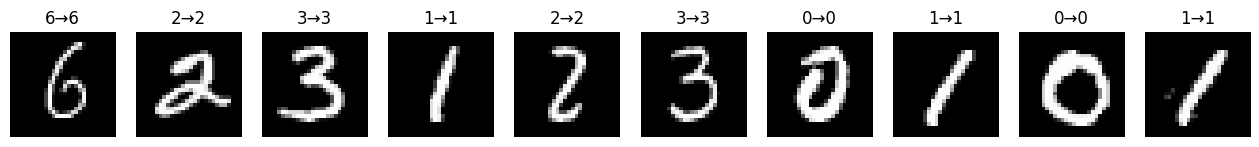

In [18]:
### 확인할 결과의 수
fig_n = 10
### 임의의 결과 확인
rand_idx = np.random.randint(0, len(y_test), fig_n)
### 결과 확인
fig = plt.figure()
for i in range(fig_n):
    idx = rand_idx[i]
    img = X_test_raw[idx].reshape(28, 28)
    fig.add_subplot(1, fig_n, i+1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(y_test[idx])+'→'+str(pred_svc[idx]))

▢ 모형 저장 및 불러오기

In [19]:
### Package & module
import joblib

In [20]:
### 모형 저장
joblib.dump(fit_svc, "fit_svc.pkl")

['fit_svc.pkl']

In [21]:
### scaler 저장
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [22]:
### 모형 불러오기
model = joblib.load("fit_svc.pkl")

In [23]:
### 영상 분류
pred_model = model.predict(X_test[:20])

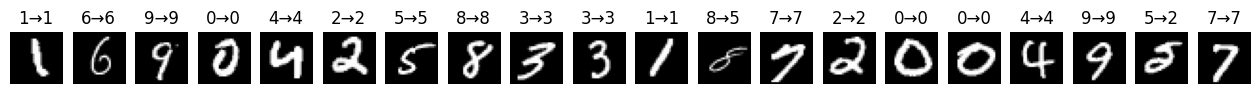

In [24]:
### 분류 결과 확인
fig_n = len(pred_model)
fig = plt.figure()
for i in range(fig_n):
    img = X_test_raw[i].reshape(28, 28)
    fig.add_subplot(1, fig_n, i+1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(y_test[i])+'→'+str(pred_model[i]))